In [1]:
import polars as pl 
import sys
from pathlib import Path
import importlib
import matplotlib.pyplot as plt

# Set the font family to Arial
# https://g.co/gemini/share/3898a74b2d77
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.sans-serif'] = ['Arial'] # Add Arial to the sans-serif list

plt.rcParams.update({
    'font.size': 20,
})

METH_READ_PHASED_DIR = Path('/scratch/ucgd/lustre-labs/quinlan/data-shared/dna-methylation/CEPH1463.GRCh38.hifi.founder-phased.all-cpgs')

REPO_DIR = Path("/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry")
sys.path.append(str(REPO_DIR / "src" / "util"))
sys.path.append(f"{REPO_DIR}/src") 

pl.Config.set_tbl_rows(10) 

polars.config.Config

## Read pre-computed difference of haplotype-specific methylations for all samples 

In [2]:
from read_data import read_dataframe_from_bed

def read_all_samples(bed): 
    df = read_dataframe_from_bed(bed)
    return df

DF_DELTA_METH_ALL_SAMPLES = read_all_samples('delta_meth_all_samples.bed')
print(len(DF_DELTA_METH_ALL_SAMPLES))
DF_DELTA_METH_ALL_SAMPLES.sample(10)

2903221


chrom,start,end,NA12877_num_cpgs,NA12877_num_valid_cpgs,NA12877_num_valid_cpgs_pat,NA12877_num_valid_cpgs_mat,NA12877_count,NA12877_model,NA12878_num_cpgs,NA12878_num_valid_cpgs,NA12878_num_valid_cpgs_pat,NA12878_num_valid_cpgs_mat,NA12878_count,NA12878_model,NA12887_num_cpgs,NA12887_num_valid_cpgs,NA12887_num_valid_cpgs_pat,NA12887_num_valid_cpgs_mat,NA12887_count,NA12887_model,NA12885_num_cpgs,NA12885_num_valid_cpgs,NA12885_num_valid_cpgs_pat,NA12885_num_valid_cpgs_mat,NA12885_count,NA12885_model,NA12883_num_cpgs,NA12883_num_valid_cpgs,NA12883_num_valid_cpgs_pat,NA12883_num_valid_cpgs_mat,NA12883_count,NA12883_model,NA12881_num_cpgs,NA12881_num_valid_cpgs,NA12881_num_valid_cpgs_pat,NA12881_num_valid_cpgs_mat,…,200087_model,200101_num_cpgs,200101_num_valid_cpgs,200101_num_valid_cpgs_pat,200101_num_valid_cpgs_mat,200101_count,200101_model,200102_num_cpgs,200102_num_valid_cpgs,200102_num_valid_cpgs_pat,200102_num_valid_cpgs_mat,200102_count,200102_model,200103_num_cpgs,200103_num_valid_cpgs,200103_num_valid_cpgs_pat,200103_num_valid_cpgs_mat,200103_count,200103_model,200104_num_cpgs,200104_num_valid_cpgs,200104_num_valid_cpgs_pat,200104_num_valid_cpgs_mat,200104_count,200104_model,200105_num_cpgs,200105_num_valid_cpgs,200105_num_valid_cpgs_pat,200105_num_valid_cpgs_mat,200105_count,200105_model,200106_num_cpgs,200106_num_valid_cpgs,200106_num_valid_cpgs_pat,200106_num_valid_cpgs_mat,200106_count,200106_model
str,i64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,…,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,f64,f64
"""chr3""",101775000,101776000,6,6,6,6,0.011833,-0.005833,6,6,6,6,0.019333,-0.003667,6,6,6,6,0.0505,0.055333,6,6,0,0,null,null,6,6,6,6,-0.043833,-0.008667,6,6,0,6,…,-0.011333,6,6,0,0,null,null,6,6,0,0,null,null,6,6,6,6,-0.002333,0.028333,6,6,6,6,-0.173167,-0.133833,6,6,6,6,0.033333,0.018,6,6,0,0,null,null
"""chr10""",121532000,121533000,20,20,20,20,0.02545,0.0389,20,20,20,20,-0.0136,-0.0139,20,20,20,20,0.01015,-0.0526,20,20,20,20,0.0086,0.02675,20,20,0,0,null,null,20,20,20,20,…,null,20,20,20,20,-0.0041,0.0032,20,20,20,20,-0.0247,-0.02565,20,20,20,20,-0.03615,-0.0005,20,20,20,20,0.022,0.0086,20,20,20,20,-0.00665,-0.0299,20,20,20,20,-0.00275,-0.01145
"""chr6""",2142000,2143000,13,13,13,13,0.045692,0.070769,13,13,13,13,0.044,0.061538,13,13,13,13,-0.082231,-0.085692,13,13,13,13,-0.041769,-0.046,13,13,13,13,0.030923,0.070231,13,13,13,13,…,null,13,13,13,13,0.051385,0.036231,13,13,13,13,0.035077,0.074462,13,13,13,13,-0.048077,-0.019385,13,13,13,13,0.013308,-0.037769,13,13,13,13,0.023923,0.044692,13,13,13,13,-0.000615,0.024769
"""chr14""",79146000,79147000,5,5,5,5,0.0236,-0.017,5,5,0,0,null,null,5,5,5,5,-0.0776,-0.0806,5,5,5,5,0.0446,0.0384,5,5,5,5,-0.0382,-0.0344,5,5,5,5,…,0.03,5,5,5,5,0.054,0.014,5,5,5,5,0.0438,0.0186,5,5,0,0,null,null,5,5,5,5,-0.0208,0.011,5,5,0,0,null,null,5,5,0,0,null,null
"""chr15""",32834000,32835000,5,5,0,0,null,null,4,4,4,4,0.0485,0.0735,4,4,4,4,0.13575,0.21075,4,4,4,4,0.0025,0.11875,4,4,4,4,0.0355,0.06725,4,4,4,4,…,null,4,4,4,4,-0.00925,-0.0495,4,4,4,4,-0.01575,-0.0225,4,4,4,4,-0.00075,-0.0395,4,4,4,4,0.0655,0.0555,4,4,4,4,0.1365,0.088,5,5,5,5,0.0418,0.0556
"""chrX""",14860000,14861000,3,3,0,0,null,null,3,3,3,3,0.107667,0.119667,3,3,3,3,-0.100667,-0.138667,3,3,0,0,null,null,3,3,0,0,null,null,3,3,0,0,…,null,3,3,0,0,null,null,3,3,0,0,null,null,3,3,3,3,-0.022667,-0.010333,3,3,3,3,0.054333,0.215667,3,3,0,0,null,null,3,3,3,3,0.104,0.194333
"""chr12""",56150000,56151000,8,8,8,8,-0.044875,-0.01575,8,8,8,8,-0.072,-0.07425,8,8,0,0,null,null,8,8,0,0,null,null,8,8,0,8,null,null,8,8,0,0,…,null,8,8,8,8,0.02775,0.044,8,8,8,8,0.02125,0.056125,8,8,8,8,0.077125,0.240875,8,8,8,8,-0.020125,-0.054875,8,8,8,8,-0.007875,0.004375,8,8,0,8,null,null
"""chr21""",38198000,38199000,1,1,1,1,0.088,0.049,1,1,1,1,-0.014,0.043,1,1,1,1,0.157,0.04

## Call candidate imprinted loci across all samples using caller developed in imprinting.2.ipynb

In [3]:
import imprinting
importlib.reload(imprinting)
from imprinting import call_imprinted_loci

DF_IMPRINTED_CANDIDATES = call_imprinted_loci(
    DF_DELTA_METH_ALL_SAMPLES, 
    meth_mode='model',
    delta_meth_threshold=0.76, 
    num_valid_cpgs_per_hap_threshold=5,
    valid_cpg_ratio_threshold=0.5
)
DF_IMPRINTED_CANDIDATES.sample(10, seed=42) 

Number of candidate imprinted loci: 207


chrom,start,end,imprinted_samples,num_imprinted_samples,locus
str,i64,i64,list[str],u32,str
"""chrX""",49235000,49236000,"[""200081""]",1,"""chrX:49235000-49236000"""
"""chr9""",42296000,42297000,"[""NA12884""]",1,"""chr9:42296000-42297000"""
"""chrX""",131822000,131823000,"[""200081""]",1,"""chrX:131822000-131823000"""
"""chrX""",30713000,30714000,"[""200081""]",1,"""chrX:30713000-30714000"""
"""chrX""",49191000,49192000,"[""200081""]",1,"""chrX:49191000-49192000"""
"""chr20""",30899000,30900000,"[""NA12877""]",1,"""chr20:30899000-30900000"""
"""chr4""",19520000,19521000,"[""NA12887"", ""NA12885"", … ""200106""]",11,"""chr4:19520000-19521000"""
"""chr20""",58840000,58841000,"[""NA12877"", ""NA12878"", … ""200106""]",18,"""chr20:58840000-58841000"""
"""chr7""",23490000,23491000,"[""NA12877"", ""NA12882"", … ""200105""]",10,"""chr7:23490000-23491000"""


## [All Samples] Inspect consistency of methylation on pat and mat haplotypes at imprinted loci across samples 

In [4]:
# This cell takes 5mins to run:

In [ ]:
# import methylation 
# importlib.reload(methylation)
# from methylation import compute_methylation_all_samples_at_given_loci

# from write_data import write_dataframe_to_bed

# DF_METH_IMPRINTED_ALL_SAMPLES = compute_methylation_all_samples_at_given_loci(DF_IMPRINTED_CANDIDATES, METH_READ_PHASED_DIR)
# write_dataframe_to_bed(DF_METH_IMPRINTED_ALL_SAMPLES, 'imprinted_meth_all_samples.bed', source=globals()["__vsc_ipynb_file__"])

  0%|          | 0/24 [00:00<?, ?it/s]

 42%|████▏     | 10/24 [03:40<05:00, 21.46s/it]

Could not read CpG sites at which count- and model-based methylation levels have been phased to founder haplotypes
Required file does not exist: '/scratch/ucgd/lustre-labs/quinlan/data-shared/dna-methylation/CEPH1463.GRCh38.hifi.founder-phased.all-cpgs/200080.dna-methylation.founder-phased.all_cpgs.sorted.bed.gz'
This may be because this sample is a founder and therefore cannot be inheritance-based phased


 71%|███████   | 17/24 [05:52<02:23, 20.54s/it]

Could not read CpG sites at which count- and model-based methylation levels have been phased to founder haplotypes
Required file does not exist: '/scratch/ucgd/lustre-labs/quinlan/data-shared/dna-methylation/CEPH1463.GRCh38.hifi.founder-phased.all-cpgs/200100.dna-methylation.founder-phased.all_cpgs.sorted.bed.gz'
This may be because this sample is a founder and therefore cannot be inheritance-based phased


100%|██████████| 24/24 [07:59<00:00, 19.98s/it]


In [9]:
DF_METH_IMPRINTED_CANDIDATES = read_all_samples('imprinted_meth_all_samples.bed')
DF_METH_IMPRINTED_CANDIDATES

chrom,start,end,NA12877_num_cpgs_with_non_null_count_based_meth,NA12877_count_based_meth_pat,NA12877_num_cpgs_with_non_null_count_based_meth_pat,NA12877_model_based_meth_pat,NA12877_count_based_meth_mat,NA12877_num_cpgs_with_non_null_count_based_meth_mat,NA12877_model_based_meth_mat,NA12878_num_cpgs_with_non_null_count_based_meth,NA12878_count_based_meth_pat,NA12878_num_cpgs_with_non_null_count_based_meth_pat,NA12878_model_based_meth_pat,NA12878_count_based_meth_mat,NA12878_num_cpgs_with_non_null_count_based_meth_mat,NA12878_model_based_meth_mat,NA12887_num_cpgs_with_non_null_count_based_meth,NA12887_count_based_meth_pat,NA12887_num_cpgs_with_non_null_count_based_meth_pat,NA12887_model_based_meth_pat,NA12887_count_based_meth_mat,NA12887_num_cpgs_with_non_null_count_based_meth_mat,NA12887_model_based_meth_mat,NA12885_num_cpgs_with_non_null_count_based_meth,NA12885_count_based_meth_pat,NA12885_num_cpgs_with_non_null_count_based_meth_pat,NA12885_model_based_meth_pat,NA12885_count_based_meth_mat,NA12885_num_cpgs_with_non_null_count_based_meth_mat,NA12885_model_based_meth_mat,NA12883_num_cpgs_with_non_null_count_based_meth,NA12883_count_based_meth_pat,NA12883_num_cpgs_with_non_null_count_based_meth_pat,NA12883_model_based_meth_pat,NA12883_count_based_meth_mat,NA12883_num_cpgs_with_non_null_count_based_meth_mat,…,200101_num_cpgs_with_non_null_count_based_meth_mat,200101_model_based_meth_mat,200102_num_cpgs_with_non_null_count_based_meth,200102_count_based_meth_pat,200102_num_cpgs_with_non_null_count_based_meth_pat,200102_model_based_meth_pat,200102_count_based_meth_mat,200102_num_cpgs_with_non_null_count_based_meth_mat,200102_model_based_meth_mat,200103_num_cpgs_with_non_null_count_based_meth,200103_count_based_meth_pat,200103_num_cpgs_with_non_null_count_based_meth_pat,200103_model_based_meth_pat,200103_count_based_meth_mat,200103_num_cpgs_with_non_null_count_based_meth_mat,200103_model_based_meth_mat,200104_num_cpgs_with_non_null_count_based_meth,200104_count_based_meth_pat,200104_num_cpgs_with_non_null_count_based_meth_pat,200104_model_based_meth_pat,200104_count_based_meth_mat,200104_num_cpgs_with_non_null_count_based_meth_mat,200104_model_based_meth_mat,200105_num_cpgs_with_non_null_count_based_meth,200105_count_based_meth_pat,200105_num_cpgs_with_non_null_count_based_meth_pat,200105_model_based_meth_pat,200105_count_based_meth_mat,200105_num_cpgs_with_non_null_count_based_meth_mat,200105_model_based_meth_mat,200106_num_cpgs_with_non_null_count_based_meth,200106_count_based_meth_pat,200106_num_cpgs_with_non_null_count_based_meth_pat,200106_model_based_meth_pat,200106_count_based_meth_mat,200106_num_cpgs_with_non_null_count_based_meth_mat,200106_model_based_meth_mat
str,i64,i64,i64,f64,i64,f64,f64,i64,f64,i64,f64,i64,f64,f64,i64,f64,i64,f64,i64,f64,f64,i64,f64,i64,f64,i64,f64,f64,i64,f64,i64,f64,i64,f64,f64,i64,…,i64,f64,i64,f64,i64,f64,f64,i64,f64,i64,f64,i64,f64,f64,i64,f64,i64,f64,i64,f64,f64,i64,f64,i64,f64,i64,f64,f64,i64,f64,i64,f64,i64,f64,f64,i64,f64
"""chr1""",68050000,68051000,47,0.180213,47,0.036426,0.843255,47,0.944745,47,0.204468,47,0.058362,0.826021,47,0.926043,47,0.840872,47,0.951766,0.223234,47,0.08734,47,0.172936,47,0.041191,0.841851,47,0.946191,47,0.197213,47,0.073064,0.858787,47,…,47,0.950468,47,0.221128,47,0.084532,0.829191,47,0.911213,47,0.182447,47,0.045362,0.833979,47,0.946064,47,0.167021,47,0.082191,0.811638,47,0.922404,47,null,0,null,null,0,null,47,0.193234,47,0.055085,0.851128,47,0.950149
"""chr1""",147078000,147079000,55,0.258636,55,0.109691,0.233273,55,0.077309,57,0.825158,57,0.930123,0.244456,57,0.079772,57,0.246719,57,0.087526,0.809333,57,0.911895,58,0.243431,58,0.072517,0.225552,58,0.056966,58,0.228448,58,0.113328,0.264017,58,…,57,0.125193,58,0.251328,58,0.204914,0.230379,58,0.113155,57,0.26607,57,0.144684,0.228772,57,0.086614,57,0.241754,57,0.093544,0.225526,57,0.085544,56,0.280982,56,0.133,0.268429,56,0.103036,58,0.271966,58,0.161793,0.262466,58,0.111931
"""chr1""",205850000,205851000,22,null,0,n

chr3:14216000-14217000
0.81 0.18 NA12877 chr3:14216000-14217000
0.80 0.83 NA12878 chr3:14216000-14217000
0.79 0.70 NA12887 chr3:14216000-14217000
0.82 0.73 NA12885 chr3:14216000-14217000
0.36 0.72 NA12883 chr3:14216000-14217000
0.33 0.70 NA12881 chr3:14216000-14217000
0.78 0.86 NA12879 chr3:14216000-14217000
0.80 0.77 NA12886 chr3:14216000-14217000
0.79 0.79 NA12884 chr3:14216000-14217000
0.79 0.73 NA12882 chr3:14216000-14217000
0.84 0.79 200082 chr3:14216000-14217000
0.25 0.74 200084 chr3:14216000-14217000
0.42 0.78 200085 chr3:14216000-14217000
0.38 0.68 200086 chr3:14216000-14217000
0.80 0.79 200087 chr3:14216000-14217000
0.72 0.79 200101 chr3:14216000-14217000
0.78 0.70 200102 chr3:14216000-14217000
0.86 0.78 200103 chr3:14216000-14217000
0.82 0.81 200104 chr3:14216000-14217000
0.86 0.75 200105 chr3:14216000-14217000


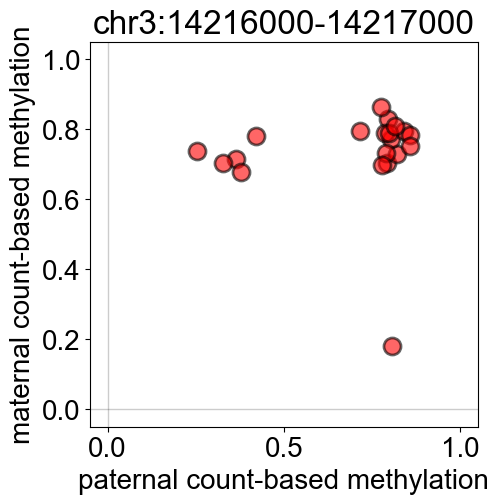

chr20:58851000-58852000
0.22 0.85 NA12877 chr20:58851000-58852000
0.19 0.87 NA12878 chr20:58851000-58852000
0.21 0.86 NA12887 chr20:58851000-58852000
0.22 0.83 NA12885 chr20:58851000-58852000
0.23 0.85 NA12883 chr20:58851000-58852000
0.23 0.81 NA12882 chr20:58851000-58852000
0.20 0.86 200081 chr20:58851000-58852000
0.28 0.85 200082 chr20:58851000-58852000
0.81 0.23 200084 chr20:58851000-58852000
0.16 0.83 200085 chr20:58851000-58852000
0.18 0.80 200086 chr20:58851000-58852000
0.18 0.81 200087 chr20:58851000-58852000
0.22 0.80 200101 chr20:58851000-58852000
0.22 0.84 200102 chr20:58851000-58852000
0.23 0.85 200103 chr20:58851000-58852000
0.20 0.79 200104 chr20:58851000-58852000
0.26 0.87 200105 chr20:58851000-58852000
0.23 0.84 200106 chr20:58851000-58852000


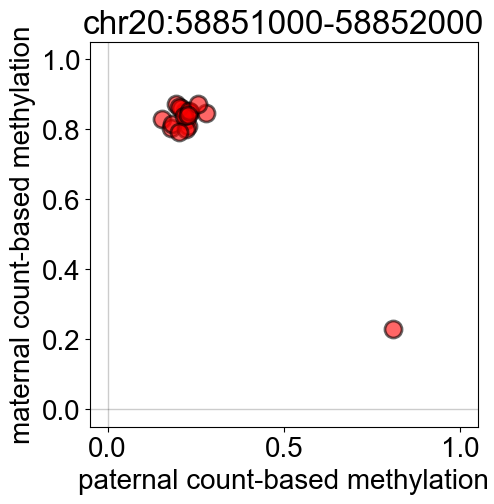

chrX:46574000-46575000
0.70 0.35 NA12887 chrX:46574000-46575000
0.78 0.18 NA12885 chrX:46574000-46575000
0.18 0.80 200081 chrX:46574000-46575000
0.72 0.37 200082 chrX:46574000-46575000
0.55 0.51 200086 chrX:46574000-46575000


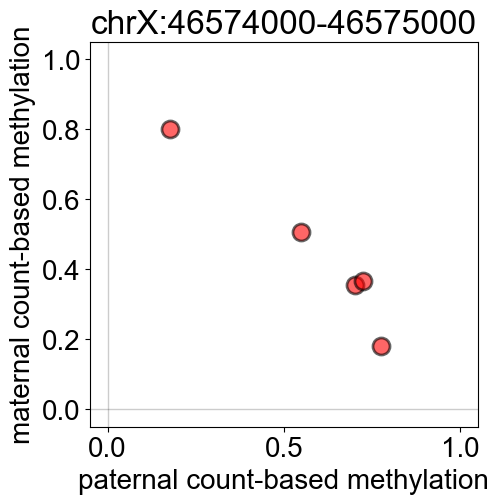

chrX:40845000-40846000
0.59 0.42 NA12878 chrX:40845000-40846000
0.42 0.58 NA12887 chrX:40845000-40846000
0.28 0.79 NA12885 chrX:40845000-40846000
0.35 0.62 NA12881 chrX:40845000-40846000
0.59 0.39 NA12879 chrX:40845000-40846000
0.75 0.32 200081 chrX:40845000-40846000
0.35 0.51 200082 chrX:40845000-40846000
0.60 0.56 200103 chrX:40845000-40846000
0.63 0.46 200104 chrX:40845000-40846000


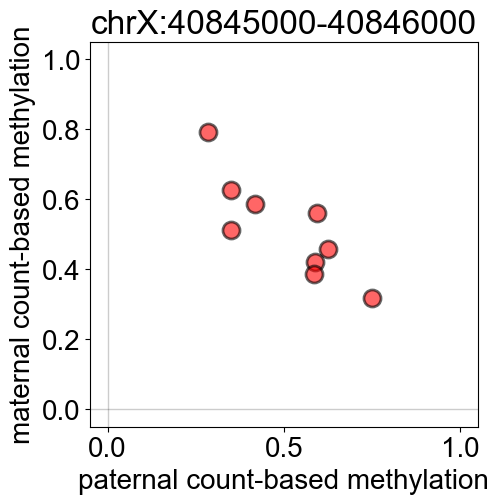

chr14:70223000-70224000
0.77 0.75 NA12877 chr14:70223000-70224000
0.28 0.74 NA12878 chr14:70223000-70224000
0.73 0.34 NA12887 chr14:70223000-70224000
0.79 0.23 NA12885 chr14:70223000-70224000
0.76 0.27 NA12883 chr14:70223000-70224000
0.71 0.32 NA12881 chr14:70223000-70224000
0.77 0.35 NA12879 chr14:70223000-70224000
0.82 0.59 NA12886 chr14:70223000-70224000
0.79 0.33 NA12884 chr14:70223000-70224000
0.72 0.37 NA12882 chr14:70223000-70224000
0.76 0.31 200081 chr14:70223000-70224000
0.41 0.29 200082 chr14:70223000-70224000
0.70 0.53 200084 chr14:70223000-70224000
0.68 0.33 200085 chr14:70223000-70224000
0.76 0.31 200086 chr14:70223000-70224000
0.40 0.26 200087 chr14:70223000-70224000
0.73 0.72 200101 chr14:70223000-70224000
0.70 0.61 200102 chr14:70223000-70224000
0.66 0.73 200103 chr14:70223000-70224000
0.74 0.54 200104 chr14:70223000-70224000
0.68 0.81 200105 chr14:70223000-70224000
0.61 0.69 200106 chr14:70223000-70224000


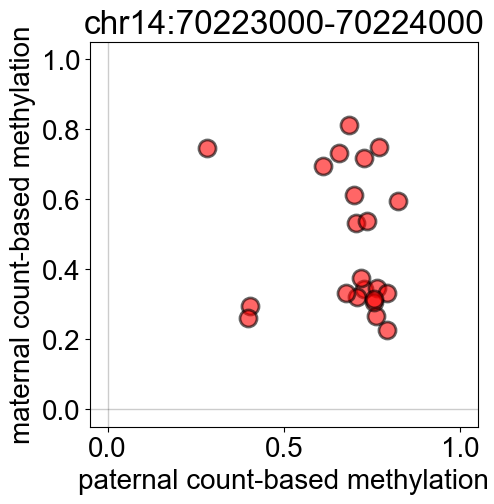

chrX:40103000-40104000
0.63 0.44 NA12878 chrX:40103000-40104000
0.24 0.68 NA12887 chrX:40103000-40104000
0.29 0.75 NA12885 chrX:40103000-40104000
0.28 0.86 200081 chrX:40103000-40104000
0.43 0.74 200082 chrX:40103000-40104000
0.51 0.57 200103 chrX:40103000-40104000
0.79 0.35 200104 chrX:40103000-40104000


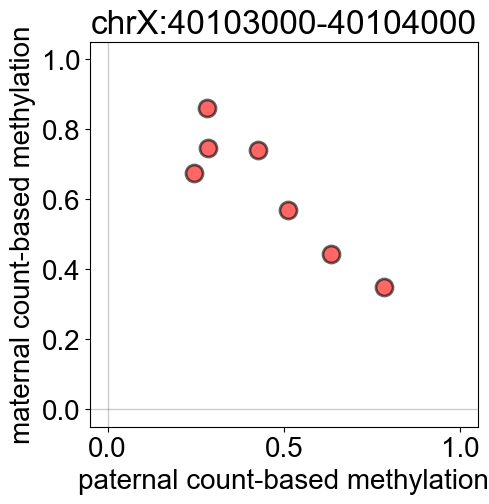

chr19:56840000-56841000
0.26 0.88 NA12877 chr19:56840000-56841000
0.29 0.87 NA12878 chr19:56840000-56841000
0.25 0.82 NA12887 chr19:56840000-56841000
0.24 0.89 NA12885 chr19:56840000-56841000
0.28 0.86 NA12883 chr19:56840000-56841000
0.24 0.86 NA12881 chr19:56840000-56841000
0.27 0.85 NA12879 chr19:56840000-56841000
0.31 0.86 NA12886 chr19:56840000-56841000
0.24 0.86 NA12884 chr19:56840000-56841000
0.27 0.84 NA12882 chr19:56840000-56841000
0.25 0.89 200081 chr19:56840000-56841000
0.27 0.89 200082 chr19:56840000-56841000
0.23 0.89 200084 chr19:56840000-56841000
0.24 0.88 200085 chr19:56840000-56841000
0.22 0.88 200086 chr19:56840000-56841000
0.25 0.88 200101 chr19:56840000-56841000
0.27 0.90 200102 chr19:56840000-56841000
0.26 0.90 200103 chr19:56840000-56841000
0.27 0.88 200104 chr19:56840000-56841000
0.26 0.83 200105 chr19:56840000-56841000
0.22 0.85 200106 chr19:56840000-56841000


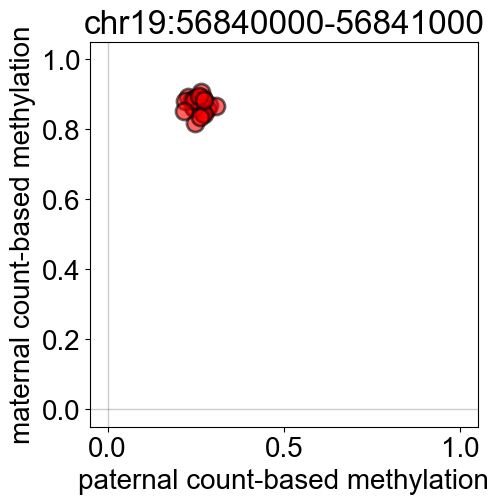

chr12:11358000-11359000
0.74 0.74 NA12877 chr12:11358000-11359000
0.76 0.06 NA12878 chr12:11358000-11359000
0.58 0.63 NA12883 chr12:11358000-11359000
0.68 0.07 NA12881 chr12:11358000-11359000
0.61 0.66 NA12879 chr12:11358000-11359000
0.60 0.59 NA12886 chr12:11358000-11359000
0.63 0.59 NA12884 chr12:11358000-11359000
0.58 0.69 NA12882 chr12:11358000-11359000
0.62 0.57 200081 chr12:11358000-11359000
0.81 0.78 200082 chr12:11358000-11359000
0.67 0.63 200084 chr12:11358000-11359000
0.73 0.69 200085 chr12:11358000-11359000
0.74 0.69 200086 chr12:11358000-11359000
0.72 0.68 200087 chr12:11358000-11359000
0.61 0.70 200101 chr12:11358000-11359000
0.55 0.67 200103 chr12:11358000-11359000
0.68 0.81 200105 chr12:11358000-11359000
0.73 0.81 200106 chr12:11358000-11359000


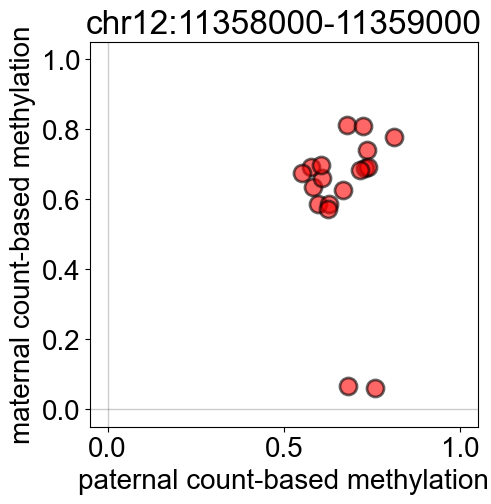

In [10]:
from get_palladium_prefixes import get_prefixes_wrapper

def plot_mat_vs_pat_meth(df, mode): 
    df = df.sample(8)
    for locus in df.iter_rows(named=True):
        chrom, start, end = locus['chrom'], locus['start'], locus['end']
        coordinate = f"{chrom}:{start}-{end}"
        print(coordinate)
        meths_pat, meths_mat, sample_ids = [], [], []
        for prefix in get_prefixes_wrapper():
            try:
                meths_pat.append(locus[f'{prefix}_{mode}_based_meth_pat'])
                meths_mat.append(locus[f'{prefix}_{mode}_based_meth_mat'])
                sample_ids.append(prefix)
            except KeyError: 
                continue

        for meth_pat, meth_mat, sample_id in zip(meths_pat, meths_mat, sample_ids): 
            if meth_pat is not None and meth_mat is not None: 
                print(f"{meth_pat:.2f}", f"{meth_mat:.2f}", sample_id, coordinate)

        plt.figure(figsize=(5,5))
        plt.scatter(
            meths_pat, 
            meths_mat,
            s=150,          
            marker='o',     
            edgecolor='black', 
            linewidths=2,   
            facecolor='red', 
            alpha=0.6   
        )
        plt.title(coordinate)
        plt.xlim(-0.05, 1.05)
        plt.ylim(-0.05, 1.05)
        plt.axvline(x=0, color='k', linestyle='-', linewidth=1, alpha=0.2)
        plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.2)
        plt.xlabel(f'paternal {mode}-based methylation')
        plt.ylabel(f'maternal {mode}-based methylation')
        plt.show()
        
plot_mat_vs_pat_meth(DF_METH_IMPRINTED_CANDIDATES, mode='count')